# Multiple Linear regression

Linear regression produces a model in the form:

$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 … + \beta_n X_n$

The way this is accomplished is by minimising the residual sum of squares, given by the equation below:

$RSS = \Sigma^n_{i=1}(y_i – \hat{y}_i)^2$,

$RSS = \Sigma^n_{i=1}(y_i – \hat{\beta_0} – \hat{\beta_{1}}x_1 – \hat{\beta_{2}}x_2 – … – \hat{\beta_{p}}x_p)$.

We will scikit-learn to perform a multiple linear regression.

Sources:
- http://benalexkeen.com/linear-regression-in-python-using-scikit-learn/
- https://onlinecourses.science.psu.edu/stat501/node/283

In [1]:
import pandas as pd

# Read the data from the web and describe
data = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/car/Prestige.csv")
data.head()

,Unnamed: 0,education,income,women,prestige,census,type
0,gov.administrators,13.11,12351,11.16,68.8,1113,prof
1,general.managers,12.26,25879,4.02,69.1,1130,prof
2,accountants,12.77,9271,15.70,63.4,1171,prof
3,purchasing.officers,11.42,8865,9.11,56.8,1175,prof
4,chemists,14.62,8403,11.68,73.5,2111,prof


In [2]:
# We will model: income ~ education + prestige + women

data = data[['education', 'women', 'prestige', 'income']]

print(data.describe())
data.head()

        education       women    prestige        income
count  102.000000  102.000000  102.000000    102.000000
mean    10.738039   28.979020   46.833333   6797.901961
std      2.728444   31.724931   17.204486   4245.922227
min      6.380000    0.000000   14.800000    611.000000
25%      8.445000    3.592500   35.225000   4106.000000
50%     10.540000   13.600000   43.600000   5930.500000
75%     12.647500   52.202500   59.275000   8187.250000
max     15.970000   97.510000   87.200000  25879.000000


,education,women,prestige,income
0,13.11,11.16,68.8,12351
1,12.26,4.02,69.1,25879
2,12.77,15.70,63.4,9271
3,11.42,9.11,56.8,8865
4,14.62,11.68,73.5,8403


/home/salva/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


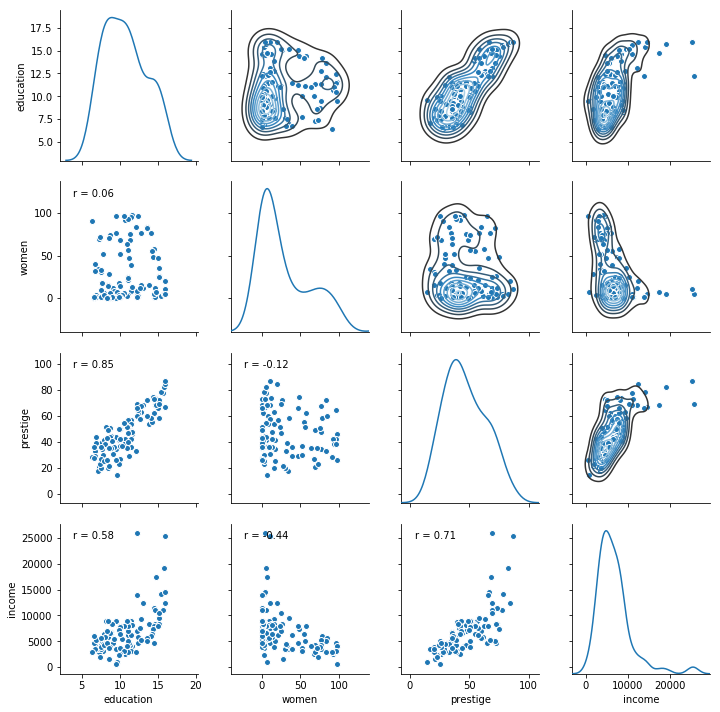

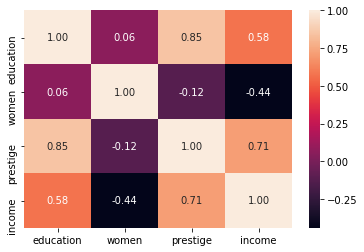

In [5]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.pairplot(data, diag_kind="kde")
g.map_upper(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)
plt.show()

sns.heatmap(data.corr(), annot=True, fmt=".2f")

In [6]:
import statsmodels.api as sm
from scipy import stats
import numpy as np

# We are going to build a linear model from our data
# and evaluate the variables importance
# Let's build Model 1

X_data = data[['education', 'women', 'prestige']]
y = data[['income']]

# sm does not include intercept by default we have to manually add it 
X2 = sm.add_constant(X_data)
est = sm.OLS(y, X2)  # Ordinary least squares
est2 = est.fit()  # fit model
print(est2.summary())
print("Residual standard error:", np.sqrt(est2.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     58.89
Date:                Sat, 03 Mar 2018   Prob (F-statistic):           7.51e-22
Time:                        21:49:19   Log-Likelihood:                -943.75
No. Observations:                 102   AIC:                             1895.
Df Residuals:                      98   BIC:                             1906.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -253.8497   1086.157     -0.234      0.8

- We have that R2 = 0.6432, thus 64.32% of the variance of income, is explained by the model (education + prestige + women).

- What is the predictors importance? We look for the value of P>|t|.

- We will build another model leaving out education. 

In [7]:
# Model 2

X_data = data[['women', 'prestige']]
y = data[['income']]

# sm does not include intercept by default we have to manually add it 
X2 = sm.add_constant(X_data)
est = sm.OLS(y, X2)  # Ordinary least squares
est2 = est.fit()  # fit model
print(est2.summary())
print("Residual standard error:", np.sqrt(est2.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     87.98
Date:                Sat, 03 Mar 2018   Prob (F-statistic):           1.09e-22
Time:                        21:49:25   Log-Likelihood:                -944.21
No. Observations:                 102   AIC:                             1894.
Df Residuals:                      99   BIC:                             1902.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        431.5744    807.630      0.534      0.5

Model 2 is better than Model 1, it has a larger F value. 
The Residual standard error and Adj. R-squared
are slightly improved.
It would be a good idea to perform an atypical values analysis.

Look for the analysis of variance (ANOVA) F-test, to assess the model,
and P>|t|, to assess the variable importance (coefficients)
See: 
- http://blog.minitab.com/blog/adventures-in-statistics-2/what-is-the-f-test-of-overall-significance-in-regression-analysis
- http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients
- http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
- https://onlinecourses.science.psu.edu/stat857/node/45

# We will perform a machine learning analysis using a linear regression

In [8]:
# Read the data from the web and assign columns names
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [9]:
# Describe the data
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
# We can use groupby to describe mpg grouped by cylinders

data.groupby(['cylinders']).mpg.describe()

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
3.0,4.0,20.550000,2.564501,18.0,18.75,20.25,22.05,23.7
4.0,204.0,29.286765,5.710156,18.0,25.00,28.25,33.00,46.6
5.0,3.0,27.366667,8.228204,20.3,22.85,25.40,30.90,36.4
6.0,84.0,19.985714,3.807322,15.0,18.00,19.00,21.00,38.0
8.0,103.0,14.963107,2.836284,9.0,13.00,14.00,16.00,26.6


In [11]:
# Let's check for nan values

print(data.isnull().sum())

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model           0
origin          0
car_name        0
dtype: int64


In [12]:
# Remove missing values
data = data.dropna(axis=0, how='any')

# Remove the column car_name (why we are doing this?)
data = data.drop('car_name', axis=1)

In [13]:
# Let's check our data
print(data.isnull().sum())
data.head()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
dtype: int64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [14]:
# origin is categorical but in our data was given as numeric
# Let's transform our data
# 1: 'america', 2: 'europe', 3: 'asia'

data['origin'] = data['origin'].replace({1.0: 'america', 2.0: 'europe', 3.0: 'asia'})

# We will create dummy variables for origin
# See: https://www.moresteam.com/whitepapers/download/dummy-variables.pdf
data = pd.get_dummies(data, columns=['origin'])

print(data.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  model  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   70.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   70.0   
2  18.0        8.0         318.0       150.0  3436.0          11.0   70.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   70.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   70.0   

   origin_america  origin_asia  origin_europe  
0               1            0              0  
1               1            0              0  
2               1            0              0  
3               1            0              0  
4               1            0              0  


In [15]:
# Split the data in train and test sets
from sklearn.model_selection import train_test_split

X = data.drop('mpg', axis=1)
y = data[['mpg']]  # the double brackets generates a column

# Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [16]:
from sklearn.linear_model import LinearRegression

# Build the regressor and fit our train data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# Print the results of the model
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The coefficient for cylinders is -0.2463375586996167
The coefficient for displacement is 0.02387033830714957
The coefficient for horsepower is -0.006017238617773325
The coefficient for weight is -0.007336432943899315
The coefficient for acceleration is 0.21897778104124824
The coefficient for model is 0.7851801072779493
The coefficient for origin_america is -1.7624934092199247
The coefficient for origin_asia is 0.8096269190858489
The coefficient for origin_europe is 0.9528664901340749
The intercept for our model is -19.809183848815866


In [18]:
# How good is our model?
print("El valor de R2 es:", regression_model.score(X_test, y_test))

# 82.85% of the variability in Y can be explained by X

El valor de R2 es: 0.8285231316459774


In [19]:
from sklearn.metrics import mean_squared_error

# We can use our model to predict 
y_predict = regression_model.predict(X_test)

# How good is our prediction 
regression_model_mse = mean_squared_error(y_predict, y_test)

print("MSE:", regression_model_mse)

print("RMSE:", np.sqrt(regression_model_mse))
# We are an average of 3.50 mpg away from the truth mpg when making predictions on our test set.

MSE: 12.230963834602667
RMSE: 3.4972794904900963


## Making Predictions

We can use our model to predict the miles per gallon for another, unseen car. Let’s give it a go on the following:

- Cylinders – 4
- Displacement – 121
- Horsepower – 110
- Weight – 2800
- Acceleration – 15.4
- Year – 81
- Origin – Asia

In [20]:
regression_model.predict([[4, 121, 110, 2800, 15.4, 81, 0, 1, 0]])

array([[28.6713418]])

The car above is the information for a Saab 900s and it turns out that this is quite close to the actual mpg of 26 mpg for this car.

If you are interested in prediction intervals try:
http://markthegraph.blogspot.com/2015/05/using-python-statsmodels-for-ols-linear.html
or
https://stackoverflow.com/questions/17559408/confidence-and-prediction-intervals-with-statsmodels

In [21]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Sat, 03 Mar 2018   Prob (F-statistic):          1.79e-139
Time:                        21:49:55   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.0951      3.482     -3.

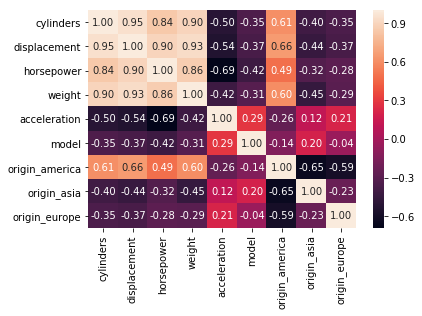

In [22]:
sns.heatmap(X.corr(), annot=True, fmt=".2f")